<a href="https://colab.research.google.com/github/nahin333/DL-practice-codes/blob/main/mnist_ann_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [109]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [110]:
X_train.shape

(60000, 28, 28)

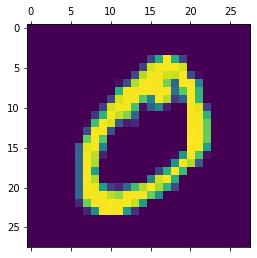

In [111]:
plt.matshow(X_train[1])

In [112]:
y_train[1]

0

In [113]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [114]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [115]:
X_train_flattened.shape

(60000, 784)

#ANN

In [116]:
ann = models.Sequential([
   keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

In [117]:
ann.compile(
   optimizer = 'adam',
   loss = 'sparse_categorical_crossentropy',
   metrics = ['accuracy'])

In [118]:
ann.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4726 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9257


In [119]:
ann.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.9259


[0.2693210542201996, 0.9258999824523926]

In [120]:
y_predicted = ann.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

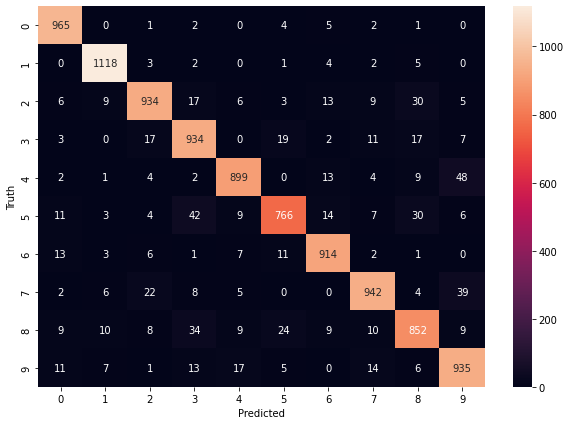

In [121]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test_flattened)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.89      0.92      0.90      1010
           4       0.94      0.92      0.93       982
           5       0.92      0.86      0.89       892
           6       0.94      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.89      0.87      0.88       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



#CNN

In [123]:
X_train = X_train.reshape(-1,28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [124]:
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [125]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [126]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1600 - accuracy: 0.9530
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0571 - accuracy: 0.9829
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0399 - accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0199 - accuracy: 0.9936


In [127]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0481 - accuracy: 0.9847


[0.04810874164104462, 0.9847000241279602]

In [128]:
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

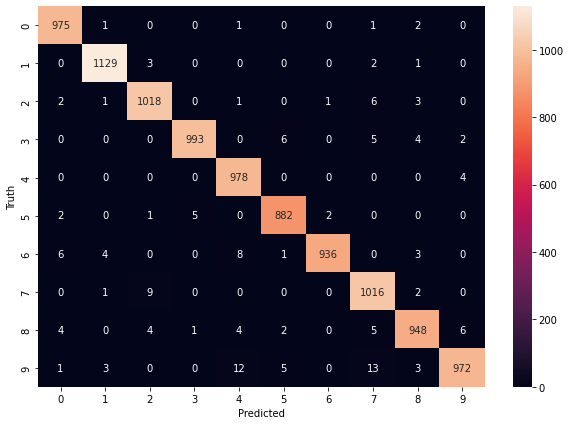

In [129]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [130]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

